<a href="https://colab.research.google.com/github/clementbowe14/ml-class/blob/main/projects/Amazon%20Reviews/AmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


model_scores = []
data_df = pd.read_csv("http://34.82.108.37/amazonReviewsTrain.csv.zip")
data_df.head()

<ipython-input-1-c2d660663bad>:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("http://34.82.108.37/amazonReviewsTrain.csv.zip")


,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating
0,True,"05 4, 2017",A2QNLVLQHW6OOC,B00NEZNT74,Jason L.,Have 30 of these in operation great lights,Five Stars,1493856000,NaN,{'Size:': ' 4PC'},NaN,positive
1,True,"12 1, 2014",A32SHV461SUWNQ,B002Q0WTCE,Richard C.,"Good replacement. I prefer my Rovner L5, but ...",Good replacement. I prefer my Rovner L5,1417392000,NaN,NaN,NaN,positive
2,True,"12 23, 2015",A2SKHG5ULPYIMC,B0002GFP9I,BellaLatinaReina-ACP Zero-Nine-Five,My son & band teacher loves it. Really nice. B...,Really Helps With Their Practice Pad,1450828800,NaN,NaN,NaN,positive
3,True,"09 4, 2013",A2MFJ6C67AL015,B003AJVKDO,BOS116,This was a gift for a friend who is a fan of t...,Guitar picks,1378252800,NaN,{'Color:': ' Logo'},NaN,positive
4,True,"08 28, 2015",ACYCDUUE9A3T2,B004XNK7AI,jack edwards,Wish it would attach to my violin a little eas...,... to my violin a little easier but it works ...,1440720000,NaN,{'Color:': ' Black - SN-5'},NaN,positive


In [2]:
# https://stackoverflow.com/questions/34724246/attributeerror-float-object-has-no-attribute-lower

data_text = data_df.reviewText.astype('str')
data_labels = data_df.rating.astype('str')

In [3]:
pattern = r'[^\w\s]|\d'
data_text = data_text.str.replace(pattern, '')
data_text[0]

<ipython-input-3-09384e363b90>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_text = data_text.str.replace(pattern, '')


'Have  of these in operation great lights'

In [4]:
labels = pd.get_dummies(data_labels)
labels

,negative,neutral,positive
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
221387,0,0,1
221388,0,0,1
221389,0,0,1
221390,0,0,1


In [5]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(data_text)
sequences = tokenizer.texts_to_sequences(data_text)

In [6]:
from keras.utils import pad_sequences

maxlen = 300
padded_data_sequences = pad_sequences(sequences, maxlen=maxlen)

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(padded_data_sequences, labels, test_size=0.2)

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

vocabulary_size = 20000
embedding_size = 300
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=maxlen))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          6000000   
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 3)                 270003    
                                                                 
Total params: 6,270,003
Trainable params: 6,270,003
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(
    train_X,
    train_y,
    epochs=10,
    steps_per_epoch=1000,
    validation_split=0.2,
    validation_steps=10,
)

Epoch 1/10
1000/1000 [==============================] - 69s 67ms/step - loss: 0.3756 - accuracy: 0.8762 - val_loss: 0.3246 - val_accuracy: 0.8861
Epoch 2/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.2706 - accuracy: 0.9041 - val_loss: 0.3254 - val_accuracy: 0.8891
Epoch 3/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.2051 - accuracy: 0.9294 - val_loss: 0.3437 - val_accuracy: 0.8910
Epoch 4/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1547 - accuracy: 0.9493 - val_loss: 0.3698 - val_accuracy: 0.8876
Epoch 5/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1192 - accuracy: 0.9626 - val_loss: 0.4161 - val_accuracy: 0.8821
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0944 - accuracy: 0.9721 - val_loss: 0.4452 - val_accuracy: 0.8840
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0771 - accuracy: 0.9784 - val_loss: 0.4924 - val_acc

1000/1000 [==============================] - 5s 5ms/step - loss: 0.0502 - accuracy: 0.9869 - val_loss: 0.5867 - val_accuracy: 0.8773


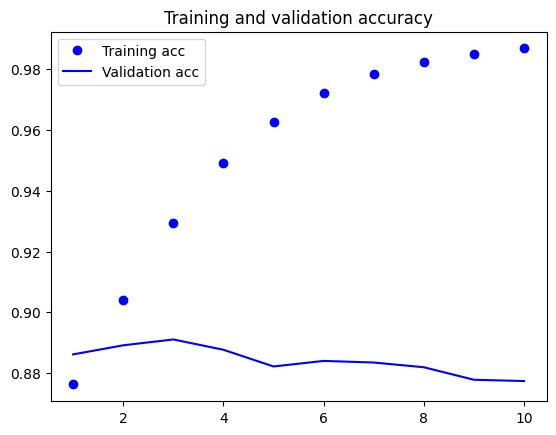

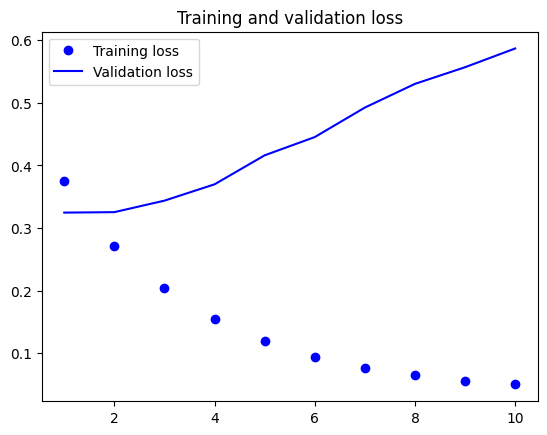

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Accuracy: {}    Loss: {}'.format(test_acc, test_loss))
model_scores.append([model, test_acc])

1384/1384 [==============================] - 3s 2ms/step - loss: 0.5865 - accuracy: 0.8777
Accuracy: 0.8776846528053284    Loss: 0.5865160226821899


In [13]:
!curl http://zacharski.org/files/courses/cs419/glove.6B.100d.zip > glove.6B.100d.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128M  100  128M    0     0  11.5M      0  0:00:11  0:00:11 --:--:-- 13.8M
glove.6B.100d.zip  sample_data


In [14]:
!unzip glove.6B.100d.zip

Archive:  glove.6B.100d.zip
  inflating: glove.6B.100d.txt       


In [15]:
!curl https://github.com/zacharski/ml-class/raw/master/data/fasttext.zip > fasttext.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [16]:
import numpy as np

In [17]:

def create_embedding_matrix(file_name, max_words, embedding_dim):
  embeddings_index = {}
  f = open(file_name)
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
  f.close()

  word_index = tokenizer.word_index

  embedding_matrix = np.zeros((max_words, embedding_dim))
  for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
  return embedding_matrix

In [23]:
embedding_dim = 300
max_words = 20000
embedding_matrix = create_embedding_matrix('glove.6B.100d.txt', 20000, 300)
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 300)          6000000   
                                                                 
 flatten_2 (Flatten)         (None, 90000)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                5760064   
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11,760,259
Trainable params: 11,760,259
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [26]:
history = model.fit(
    train_X,
    train_y,
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.2,
    validation_steps=10,
)

Epoch 1/10
100/100 [==============================] - 1s 5ms/step - loss: 0.4844 - acc: 0.8669 - val_loss: 0.4842 - val_acc: 0.8670
Epoch 2/10
100/100 [==============================] - 0s 5ms/step - loss: 0.4844 - acc: 0.8669 - val_loss: 0.4842 - val_acc: 0.8670
Epoch 3/10
100/100 [==============================] - 0s 5ms/step - loss: 0.4844 - acc: 0.8669 - val_loss: 0.4842 - val_acc: 0.8670
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 0.4844 - acc: 0.8669 - val_loss: 0.4842 - val_acc: 0.8670
Epoch 5/10
100/100 [==============================] - 0s 5ms/step - loss: 0.4844 - acc: 0.8669 - val_loss: 0.4842 - val_acc: 0.8670
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 0.4844 - acc: 0.8669 - val_loss: 0.4842 - val_acc: 0.8670
Epoch 7/10
100/100 [==============================] - 0s 5ms/step - loss: 0.4844 - acc: 0.8669 - val_loss: 0.4842 - val_acc: 0.8670
Epoch 8/10
100/100 [==============================] - 0s 5ms/step - loss: 0.

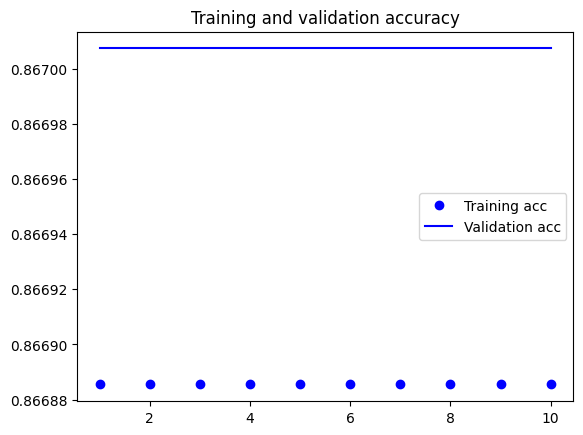

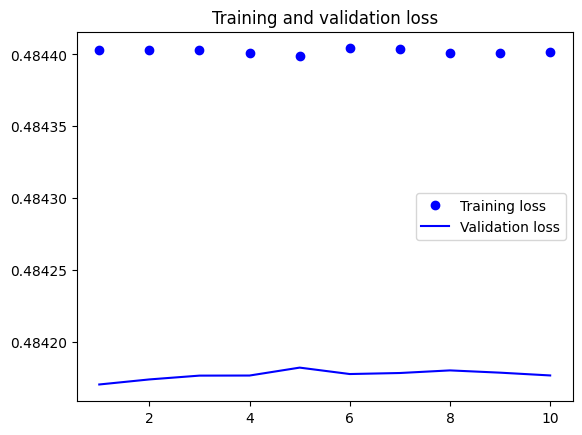

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_X, test_y)
model_scores.append([model, test_acc])

1384/1384 [==============================] - 3s 2ms/step - loss: 0.4830 - acc: 0.8674


In [32]:
!ls

fasttext.zip  glove.6B.100d.txt  glove.6B.100d.zip  sample_data


In [35]:
embedding_dim = 300
max_words = 20000
embedding_matrix = create_embedding_matrix('fasttext.vec', 20000, 300)
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 300)          6000000   
                                                                 
 flatten_3 (Flatten)         (None, 90000)             0         
                                                                 
 dense_5 (Dense)             (None, 64)                5760064   
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11,760,259
Trainable params: 11,760,259
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [37]:
history = model.fit(train_X, train_y, epochs=10, steps_per_epoch=100, validation_split=0.2, validation_steps=10)

Epoch 1/10
100/100 [==============================] - 15s 141ms/step - loss: 0.5464 - acc: 0.8586 - val_loss: 0.4435 - val_acc: 0.8670
Epoch 2/10
100/100 [==============================] - 11s 110ms/step - loss: 0.4134 - acc: 0.8675 - val_loss: 0.3925 - val_acc: 0.8679
Epoch 3/10
100/100 [==============================] - 10s 104ms/step - loss: 0.3595 - acc: 0.8755 - val_loss: 0.3602 - val_acc: 0.8761
Epoch 4/10
100/100 [==============================] - 8s 80ms/step - loss: 0.3223 - acc: 0.8867 - val_loss: 0.3307 - val_acc: 0.8824
Epoch 5/10
100/100 [==============================] - 7s 67ms/step - loss: 0.2865 - acc: 0.8981 - val_loss: 0.3235 - val_acc: 0.8865
Epoch 6/10
100/100 [==============================] - 6s 57ms/step - loss: 0.2556 - acc: 0.9096 - val_loss: 0.3237 - val_acc: 0.8880
Epoch 7/10
100/100 [==============================] - 5s 47ms/step - loss: 0.2277 - acc: 0.9202 - val_loss: 0.3213 - val_acc: 0.8910
Epoch 8/10
100/100 [==============================] - 4s 37ms/s

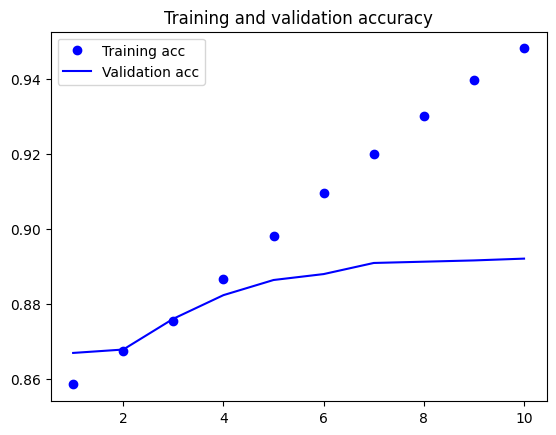

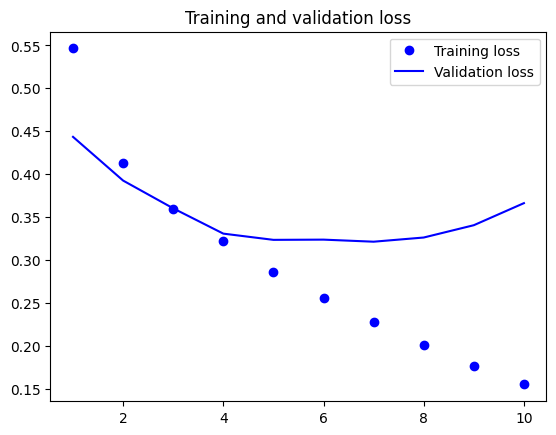

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
test_loss, test_acc = model.evaluate(test_X, test_y)
model_scores.append([model, test_acc])

1384/1384 [==============================] - 3s 2ms/step - loss: 0.3695 - acc: 0.8928


In [50]:
max = 0
best_model = None
for score in model_scores:
  if score[1] > max:
    max = score[1]
    best_model = score[0]

def mapPredictions(val):
  if val == 0:
    return 'positive'
  if val == 1:
    return 'negative'
  if val == 2:
    return 'neutral'

final_test = pd.read_csv("http://34.82.108.37/amazonReviewsTest.csv")
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(final_test)
sequences = tokenizer.texts_to_sequences(final_test)
maxlen = 300
test_padded_sequences = pad_sequences(sequences, maxlen=maxlen)
predictions = best_model.predict(test_padded_sequences)



1/1 [==============================] - 0s 28ms/step


In [52]:
final_test.head()

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,False,"08 17, 2016",AMKHFIJJ81LYJ,B00EA1U1X6,Frank P.,I am a (very amateur) EDM and Hip Hop Producer...,Extremely Happy.,1471392000,NaN,"{'style:': ' 5"" Monitor Speaker'}",NaN
1,True,"08 22, 2015",A3SZ045Z7CP56,B0002GNUYU,David A. Caufield,These are pretty beefy strings even for black ...,"once again, Rotosound strings fail to impress ...",1440201600,NaN,NaN,NaN
2,True,"07 30, 2014",AZMSVSJFACBPB,B0006LOBA8,Neurofizz,"I've played every new ""improved"" string out th...",and keep coming home to the girls that really ...,1406678400,NaN,NaN,NaN
3,True,"03 9, 2012",A39SRYB2M0Z5FG,B000Y30NAA,s.reeths,"I thought I would give this pedal a try, becau...",save up for a better pedal,1331251200,NaN,{'Style:': ' CHORUS'},NaN
4,True,"02 3, 2013",A35A62ZXXKXHIW,B002N4ZBE6,Marine Docl,Been wanting to try one for over a year. Good...,Big Six,1359849600,NaN,NaN,NaN


In [51]:
predictions

array([[0.02222067, 0.05751312, 0.9202663 ],
       [0.00876879, 0.01600025, 0.97523093],
       [0.01153856, 0.02726872, 0.9611928 ],
       [0.01949311, 0.03180879, 0.9486981 ],
       [0.01761365, 0.05131234, 0.931074  ],
       [0.02460085, 0.04137955, 0.9340197 ],
       [0.03441983, 0.04660816, 0.918972  ],
       [0.0277226 , 0.0665506 , 0.9057268 ],
       [0.05778416, 0.06619358, 0.8760223 ],
       [0.0447263 , 0.04158115, 0.9136926 ],
       [0.02252187, 0.04407947, 0.93339866]], dtype=float32)

In [47]:
predictions = np.argmax(predictions, axis=1)
results = []

for prediction in predictions:
  results.append(mapPredictions(prediction))

In [48]:
with open(r'AmazonReviewsPredictions.txt', 'w') as fp:
    for item in results:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')
from google.colab import files
files.download('AmazonReviewsPredictions.txt')

Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>